# Working of PCA on olivetti dataset from sklearn

In [1]:
## all the imports done here

# datasets for olivetti
from sklearn import datasets

# pyplot for ploting graph
import matplotlib.pyplot as plt

# PCA for dimentionality reduction
from sklearn.decomposition import PCA

In [2]:
# downloading olivetti datasets
oliv=datasets.fetch_olivetti_faces()

In [3]:
# showing oliv
oliv

# from description we come to know that there are 10 images of each person

{'DESCR': 'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n',
 'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        

In [4]:
# oliv datasets is dictionary with keys as shown below

oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
# data of oliv contains the combined info about all the faces
# 400 data values and 4096 columns
oliv["data"].shape

(400, 4096)

In [6]:
# images of faces are used for ploting them
# 400 images and size 64*64
oliv["images"].shape

(400, 64, 64)

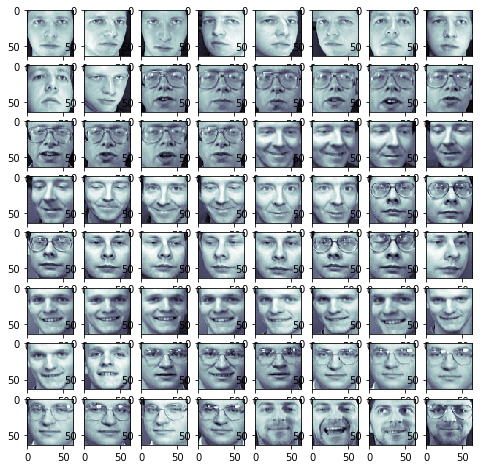

In [7]:
#  there are 40 persons each having 10 facial expressions
# here plotted just 64 of them 

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [8]:
# storing data and targets in x and y respectively
x=oliv.data
y=oliv.target


In [9]:
# applying PCA 
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# default value onf n_components=min(m,n)
# pca_components tell eigen vectors that stores the dimentionality

pca.components_.shape

(400, 4096)

In [11]:
# finding optimal value of k for variance=0.95

k=0
total=sum(pca.explained_variance_)
current_sum=0
while(current_sum/total<0.95):
    current_sum+=pca.explained_variance_[k]
    k=k+1
k
    
    


123

In [12]:
# now we apply PCA with dimentions reduced to k
pca=PCA(n_components=k,whiten=True)

# we transform the data according to pca new

transformed_data=pca.fit_transform(x)
transformed_data.shape



(400, 123)

In [13]:
# now we take inverse_transform according to out new dimensions to get back them to original form

x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [14]:
#  now reshaping to get back x_approx in size of images
x_approx_images=x_approx.reshape((400,64,64))


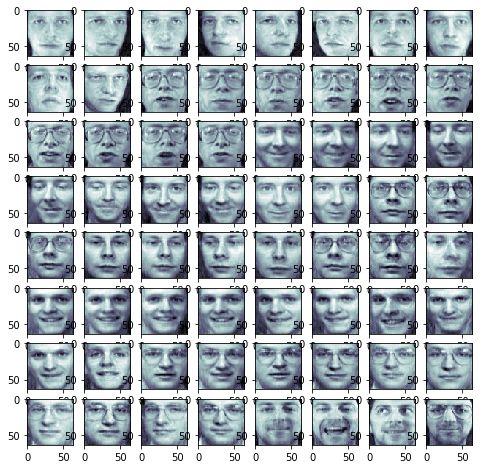

In [15]:

# now we again plot out x_approx images 
# remarkable thing is that we are still able to plot the original images without significant loss of data

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [16]:
# storing eigen vectors from pca.components_

eigenv_=pca.components_

In [18]:
# ploting PCA components and they resemble much like faces thatswhy called eighen faces
eigenfaces=eigenv_.reshape((123,64,64))
eigenfaces.shape

(123, 64, 64)

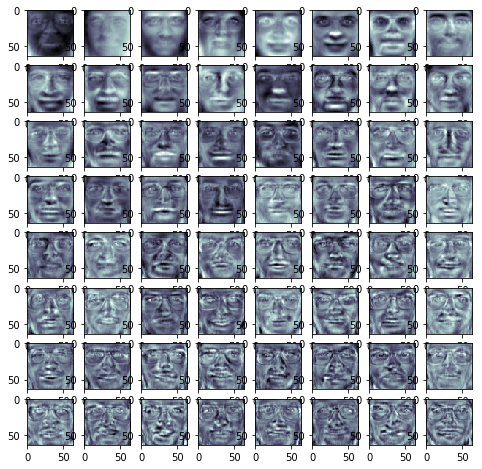

In [19]:
# ploting eigen faces
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

# Now we ll see how classifiers  predicts the 40 classes in train data

In [35]:
# two classifiers imported
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)

# imported two classifiers for spliting the data
from sklearn.model_selection import train_test_split

# for  confusion matrix
from sklearn.metrics import confusion_matrix

# for classification report
from sklearn.metrics import classification_report

In [22]:
# classifier objects
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()


In [25]:
# using train-test-split
x_train, x_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.25, random_state=0)

In [26]:
# fitting the data on both the classifiers

clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_test.shape

(100,)

In [27]:
# storing the predictions of both the classifiers
y_predict1=clf1.predict(x_test)
y_predict2=clf2.predict(x_test)



In [33]:
# printing confusion matrix for clf1
confusion_matrix(y_test,y_predict1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [48]:
# printing confusion matrix for clf2
confusion_matrix(y_test,y_predict2)


array([[1, 1, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [49]:
# printing classification report for clf1
print(classification_report(y_test,y_predict1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       1.00      0.50      0.67         4
          2       0.00      0.00      0.00         2
          3       0.50      1.00      0.67         1
          4       0.00      0.00      0.00         1
          5       1.00      0.80      0.89         5
          6       0.50      0.25      0.33         4
          7       1.00      0.67      0.80         3
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         1
         10       1.00      0.50      0.67         4
         11       0.00      0.00      0.00         1
         12       0.50      0.50      0.50         2
         13       1.00      1.00      1.00         3
         14       0.57      0.80      0.67         5
         15       1.00      0.67      0.80         3
         16       0.00      0.00      0.00         0
         17       0.50      0.17      0.25   

C:\Users\Divij\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Divij\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
# printing classification report for clf1
print(classification_report(y_test,y_predict2))

             precision    recall  f1-score   support

          0       0.33      0.17      0.22         6
          1       0.57      1.00      0.73         4
          2       0.00      0.00      0.00         2
          3       0.14      1.00      0.25         1
          4       0.17      1.00      0.29         1
          5       0.60      0.60      0.60         5
          6       0.67      0.50      0.57         4
          7       0.67      0.67      0.67         3
          9       0.50      1.00      0.67         1
         10       1.00      1.00      1.00         4
         11       0.00      0.00      0.00         1
         12       0.11      0.50      0.18         2
         13       0.50      0.33      0.40         3
         14       1.00      0.60      0.75         5
         15       1.00      0.33      0.50         3
         16       0.00      0.00      0.00         0
         17       1.00      0.17      0.29         6
         18       0.00      0.00      0.00   

C:\Users\Divij\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Divij\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
# accuracy by cl1
y1=(y_test==y_predict1)
print(y1.sum()/len(y1))


0.45


In [43]:
# accuracy by cl2
y2=(y_test==y_predict2)
print(y2.sum()/len(y2))

0.5
